<a href="https://colab.research.google.com/github/babaraokalyankar/Machine-Learning/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DECISION **TREE**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load your dataset
data = pd.read_csv("Bacillus_Bacteria_Soil_Dataset.csv")

# Exploratory Data Analysis (Optional)
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()

# Automatically detect the target column (last column assumed)
target_column = data.columns[-1]  # Assuming the last column is the target
X = data.drop(columns=[target_column])  # Features
y = data[target_column]  # Target

# Handle date columns automatically by converting to UNIX timestamp (if applicable)
for column in X.select_dtypes(include=['object']).columns:
    try:
        X[column] = pd.to_datetime(X[column])
        X[column] = X[column].astype(int) / 10**9  # Convert to UNIX timestamp (seconds since epoch)
    except Exception:
        pass  # Skip columns that cannot be converted to datetime

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# Preprocessor for handling different types of data
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),  # Scale numerical features
        ("cat", OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_columns)  # Encode categorical features
    ]
)

# Apply preprocessing to features
X_processed = preprocessor.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Dataset Head:
          Date   Time  Soil_Temperature (°C)  Rainfall_Amount (mm)   Season  \
0  2022-06-14  09:00                   29.6                 113.2  Monsoon   
1  2022-11-09  06:00                   24.5                   2.4   Winter   
2  2023-07-31  09:00                   26.7                  74.6  Monsoon   
3  2022-11-25  00:00                   21.4                   4.7   Winter   
4  2023-03-23  12:00                   34.9                  38.5   Summer   

  Soil_Texture  Soil_pH (estimated) Crop_Growth_Stage Tillage_Practice  \
0         Clay                  7.4         Flowering         Low till   
1        Loamy                  7.4         Flowering        High till   
2         Clay                  6.2         Flowering        High till   
3        Loamy                  6.9         Flowering        High till   
4        Loamy                  6.5        Vegetative         Low till   

   Soil_Moisture_Estimate (%)  Relative_Humidity (%)         Soil_Type 

<ipython-input-1-e26c6b1be5ab>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[column] = pd.to_datetime(X[column])
<ipython-input-1-e26c6b1be5ab>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[column] = pd.to_datetime(X[column])
<ipython-input-1-e26c6b1be5ab>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[column] = pd.to_datetime(X[column])
<ipython-input-1-e26c6b1be5ab>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  X[

**ANN**

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load Dataset
dataset = pd.read_csv('Bacillus_Bacteria_Soil_Dataset.csv')  # Update with your file path

# Preprocessing
target_column = "Bacillus_Bacteria_Count (CFU/g)"
X = dataset.drop(columns=[target_column, "Date", "Time"])
y = dataset[target_column]

# Separate categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["float64", "int64"]).columns

# Define the preprocessor for scaling numerical features and one-hot encoding categorical features
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_features)  # Updated sparse to sparse_output
])

# Apply preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Build ANN Model
ann_model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),  # Input layer
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(32, activation="relu"),  # Hidden layer with ReLU activation
    Dense(1)  # Output layer (no activation function for regression)
])

# Compile the model
ann_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train the model
history_ann = ann_model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)

# Evaluate the model on the test set
y_pred_ann = ann_model.predict(X_test).flatten()

# Calculate evaluation metrics
mse_ann = mean_squared_error(y_test, y_pred_ann)
rmse_ann = np.sqrt(mse_ann)
mae_ann = mean_absolute_error(y_test, y_pred_ann)
r2_ann = r2_score(y_test, y_pred_ann)

# Print the evaluation metrics
print(f"ANN -> MSE: {mse_ann:.4f}, RMSE: {rmse_ann:.4f}, MAE: {mae_ann:.4f}, R2: {r2_ann:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
ANN -> MSE: 2213329996646.8711, RMSE: 1487726.4522, MAE: 1325840.8803, R2: -3.8556


**CNN**

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Load Dataset
dataset = pd.read_csv('Bacillus_Bacteria_Soil_Dataset.csv')  # Update with your file path

# Preprocessing
target_column = "Bacillus_Bacteria_Count (CFU/g)"
X = dataset.drop(columns=[target_column, "Date", "Time"])
y = dataset[target_column]

# Ensure the same preprocessing steps as ANN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build CNN Model
cnn_model = Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation="relu", input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation="relu"),
    tf.keras.layers.Flatten(),
    Dense(64, activation="relu"),
    Dense(1)
])

cnn_model.compile(optimizer="adam", loss="mse", metrics=["mae"])
history_cnn = cnn_model.fit(X_train_cnn, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)

# Evaluate CNN
y_pred_cnn = cnn_model.predict(X_test_cnn).flatten()
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn = np.sqrt(mse_cnn)
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

# Print Evaluation Metrics
print(f"CNN -> MSE: {mse_cnn:.4f}, RMSE: {rmse_cnn:.4f}, MAE: {mae_cnn:.4f}, R2: {r2_cnn:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
CNN -> MSE: 454353938350.3604, RMSE: 674057.8153, MAE: 587937.1583, R2: 0.0032


**GBM**

In [15]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv("Bacillus_Bacteria_Soil_Dataset.csv")

# Drop unnecessary columns for the analysis
data = data.drop(columns=['Date', 'Time', 'Season', 'Soil_Texture', 'Crop_Growth_Stage', 'Tillage_Practice', 'Soil_Type'])

# Fill missing values with the mean of each respective column
data.fillna(data.mean(), inplace=True)

# One-hot encode categorical variables, dropping the first category to avoid multicollinearity
data = pd.get_dummies(data, drop_first=True)

# Define the features (X) and target variable (y)
X = data.drop(columns='Bacillus_Bacteria_Count (CFU/g)')
y = data['Bacillus_Bacteria_Count (CFU/g)']

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor model with 100 estimators (trees)
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Train the model using the training data
xgb_model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = xgb_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation results
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R²): {r2:.4f}')


Mean Squared Error (MSE): 607377124860.2338
Root Mean Squared Error (RMSE): 779344.0350
Mean Absolute Error (MAE): 637594.2987
R-squared (R²): -0.3325


**KNN**

In [16]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv('Bacillus_Bacteria_Soil_Dataset.csv')

# Display basic information and check for null values
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()

# Separate features (X) and target variable (y)
X = data.drop(columns=["Date", "Time", "Bacillus_Bacteria_Count (CFU/g)"])
y = data["Bacillus_Bacteria_Count (CFU/g)"]

# Encode categorical features using LabelEncoder
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])  # Apply encoding
    label_encoders[column] = le  # Store encoder for potential inverse transformation

# Standardize the numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the KNN Regressor with 5 neighbors
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)

# Evaluate the model's performance using common metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R² Score

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Dataset Head:
          Date   Time  Soil_Temperature (°C)  Rainfall_Amount (mm)   Season  \
0  2022-06-14  09:00                   29.6                 113.2  Monsoon   
1  2022-11-09  06:00                   24.5                   2.4   Winter   
2  2023-07-31  09:00                   26.7                  74.6  Monsoon   
3  2022-11-25  00:00                   21.4                   4.7   Winter   
4  2023-03-23  12:00                   34.9                  38.5   Summer   

  Soil_Texture  Soil_pH (estimated) Crop_Growth_Stage Tillage_Practice  \
0         Clay                  7.4         Flowering         Low till   
1        Loamy                  7.4         Flowering        High till   
2         Clay                  6.2         Flowering        High till   
3        Loamy                  6.9         Flowering        High till   
4        Loamy                  6.5        Vegetative         Low till   

   Soil_Moisture_Estimate (%)  Relative_Humidity (%)         Soil_Type 

LINEAR **REGRESSION**

In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
data = pd.read_csv("Bacillus_Bacteria_Soil_Dataset.csv")

# Display basic dataset information
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()

# Splitting the dataset into features (X) and target (y)
X = data.drop(columns=['Bacillus_Bacteria_Count (CFU/g)'])  # Features (drop the target column)
y = data['Bacillus_Bacteria_Count (CFU/g)']  # Target (the column to predict)

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['number']).columns

# Preprocessing: Standardize numerical features and OneHot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),  # Scale numerical features
        ("cat", OneHotEncoder(drop='first'), categorical_columns)  # One-hot encode categorical features
    ]
)

# Apply preprocessing to the features
X_processed = preprocessor.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using multiple metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R² Score

# Print the evaluation results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Dataset Head:
          Date   Time  Soil_Temperature (°C)  Rainfall_Amount (mm)   Season  \
0  2022-06-14  09:00                   29.6                 113.2  Monsoon   
1  2022-11-09  06:00                   24.5                   2.4   Winter   
2  2023-07-31  09:00                   26.7                  74.6  Monsoon   
3  2022-11-25  00:00                   21.4                   4.7   Winter   
4  2023-03-23  12:00                   34.9                  38.5   Summer   

  Soil_Texture  Soil_pH (estimated) Crop_Growth_Stage Tillage_Practice  \
0         Clay                  7.4         Flowering         Low till   
1        Loamy                  7.4         Flowering        High till   
2         Clay                  6.2         Flowering        High till   
3        Loamy                  6.9         Flowering        High till   
4        Loamy                  6.5        Vegetative         Low till   

   Soil_Moisture_Estimate (%)  Relative_Humidity (%)         Soil_Type 

**RF**

In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
data = pd.read_csv("Bacillus_Bacteria_Soil_Dataset.csv")

# Display basic information about the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()

# Drop unnecessary columns
columns_to_drop = ['Date', 'Time', 'Season', 'Soil_Texture', 'Crop_Growth_Stage', 'Tillage_Practice', 'Soil_Type']
data = data.drop(columns=columns_to_drop, axis=1)

# Fill missing values with the mean of each column
data.fillna(data.mean(), inplace=True)

# One-hot encode categorical variables (if any)
data = pd.get_dummies(data, drop_first=True)

# Define features (X) and target variable (y)
X = data.drop('Bacillus_Bacteria_Count (CFU/g)', axis=1)  # Features
y = data['Bacillus_Bacteria_Count (CFU/g)']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor with 100 estimators
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance using various metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R² Score

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Dataset Head:
          Date   Time  Soil_Temperature (°C)  Rainfall_Amount (mm)   Season  \
0  2022-06-14  09:00                   29.6                 113.2  Monsoon   
1  2022-11-09  06:00                   24.5                   2.4   Winter   
2  2023-07-31  09:00                   26.7                  74.6  Monsoon   
3  2022-11-25  00:00                   21.4                   4.7   Winter   
4  2023-03-23  12:00                   34.9                  38.5   Summer   

  Soil_Texture  Soil_pH (estimated) Crop_Growth_Stage Tillage_Practice  \
0         Clay                  7.4         Flowering         Low till   
1        Loamy                  7.4         Flowering        High till   
2         Clay                  6.2         Flowering        High till   
3        Loamy                  6.9         Flowering        High till   
4        Loamy                  6.5        Vegetative         Low till   

   Soil_Moisture_Estimate (%)  Relative_Humidity (%)         Soil_Type 

**RNN**

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt

# Load Dataset
dataset = pd.read_csv('Bacillus_Bacteria_Soil_Dataset.csv')  # Update with your file path

# Preprocessing
target_column = "Bacillus_Bacteria_Count (CFU/g)"
X = dataset.drop(columns=[target_column, "Date", "Time"])
y = dataset[target_column]

# Separate categorical and numerical features
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features = X.select_dtypes(include=["float64", "int64"]).columns

# Define the preprocessor for scaling numerical features and one-hot encoding categorical features
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_features)  # Updated sparse to sparse_output
])

# Apply preprocessing to the features
X_preprocessed = preprocessor.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Reshaping the data for RNN (LSTM expects 3D input)
X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Reshape to (samples, timesteps, features)
X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)  # Reshape to (samples, timesteps, features)

# Build RNN Model (LSTM)
rnn_model = Sequential([
    LSTM(64, activation="relu", return_sequences=True, input_shape=(X_train_rnn.shape[1], 1)),
    LSTM(32, activation="relu"),
    Dense(1)  # Output layer (no activation function for regression)
])

# Compile the RNN model
rnn_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train the RNN model
history_rnn = rnn_model.fit(X_train_rnn, y_train, validation_split=0.2, epochs=50, batch_size=16, verbose=0)

# Evaluate the RNN model
y_pred_rnn = rnn_model.predict(X_test_rnn).flatten()

# Calculate evaluation metrics
mse_rnn = mean_squared_error(y_test, y_pred_rnn)
rmse_rnn = np.sqrt(mse_rnn)
mae_rnn = mean_absolute_error(y_test, y_pred_rnn)
r2_rnn = r2_score(y_test, y_pred_rnn)

# Print the evaluation metrics for RNN
print(f"RNN -> MSE: {mse_rnn:.4f}, RMSE: {rmse_rnn:.4f}, MAE: {mae_rnn:.4f}, R2: {r2_rnn:.4f}")



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
RNN -> MSE: 486819114634.0746, RMSE: 697724.2397, MAE: 595802.0917, R2: -0.0680


**SVM**

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
file_path = 'Bacillus_Bacteria_Soil_Dataset.csv'
data = pd.read_csv(file_path)

# Display dataset information for initial inspection
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()

# Separate features (X) and target variable (y)
X = data.drop(columns=["Date", "Time", "Bacillus_Bacteria_Count (CFU/g)"])  # Features
y = data["Bacillus_Bacteria_Count (CFU/g)"]  # Target

# Encode categorical features using LabelEncoder
label_encoders = {}
for column in X.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])  # Transform the categorical column
    label_encoders[column] = le  # Store encoder for future use

# Standardize numerical features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the SVM regressor with an RBF kernel
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_regressor.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # R² Score

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")


Dataset Head:
          Date   Time  Soil_Temperature (°C)  Rainfall_Amount (mm)   Season  \
0  2022-06-14  09:00                   29.6                 113.2  Monsoon   
1  2022-11-09  06:00                   24.5                   2.4   Winter   
2  2023-07-31  09:00                   26.7                  74.6  Monsoon   
3  2022-11-25  00:00                   21.4                   4.7   Winter   
4  2023-03-23  12:00                   34.9                  38.5   Summer   

  Soil_Texture  Soil_pH (estimated) Crop_Growth_Stage Tillage_Practice  \
0         Clay                  7.4         Flowering         Low till   
1        Loamy                  7.4         Flowering        High till   
2         Clay                  6.2         Flowering        High till   
3        Loamy                  6.9         Flowering        High till   
4        Loamy                  6.5        Vegetative         Low till   

   Soil_Moisture_Estimate (%)  Relative_Humidity (%)         Soil_Type 

<ipython-input-22-0cc923a2d6bd>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(models, rotation=45, ha="right")
<ipython-input-22-0cc923a2d6bd>:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(models, rotation=45, ha="right")
<ipython-input-22-0cc923a2d6bd>:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 0].set_xticklabels(models, rotation=45, ha="right")
<ipython-input-22-0cc923a2d6bd>:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1, 1].set_xticklabels(models, rotation=45, ha="right")


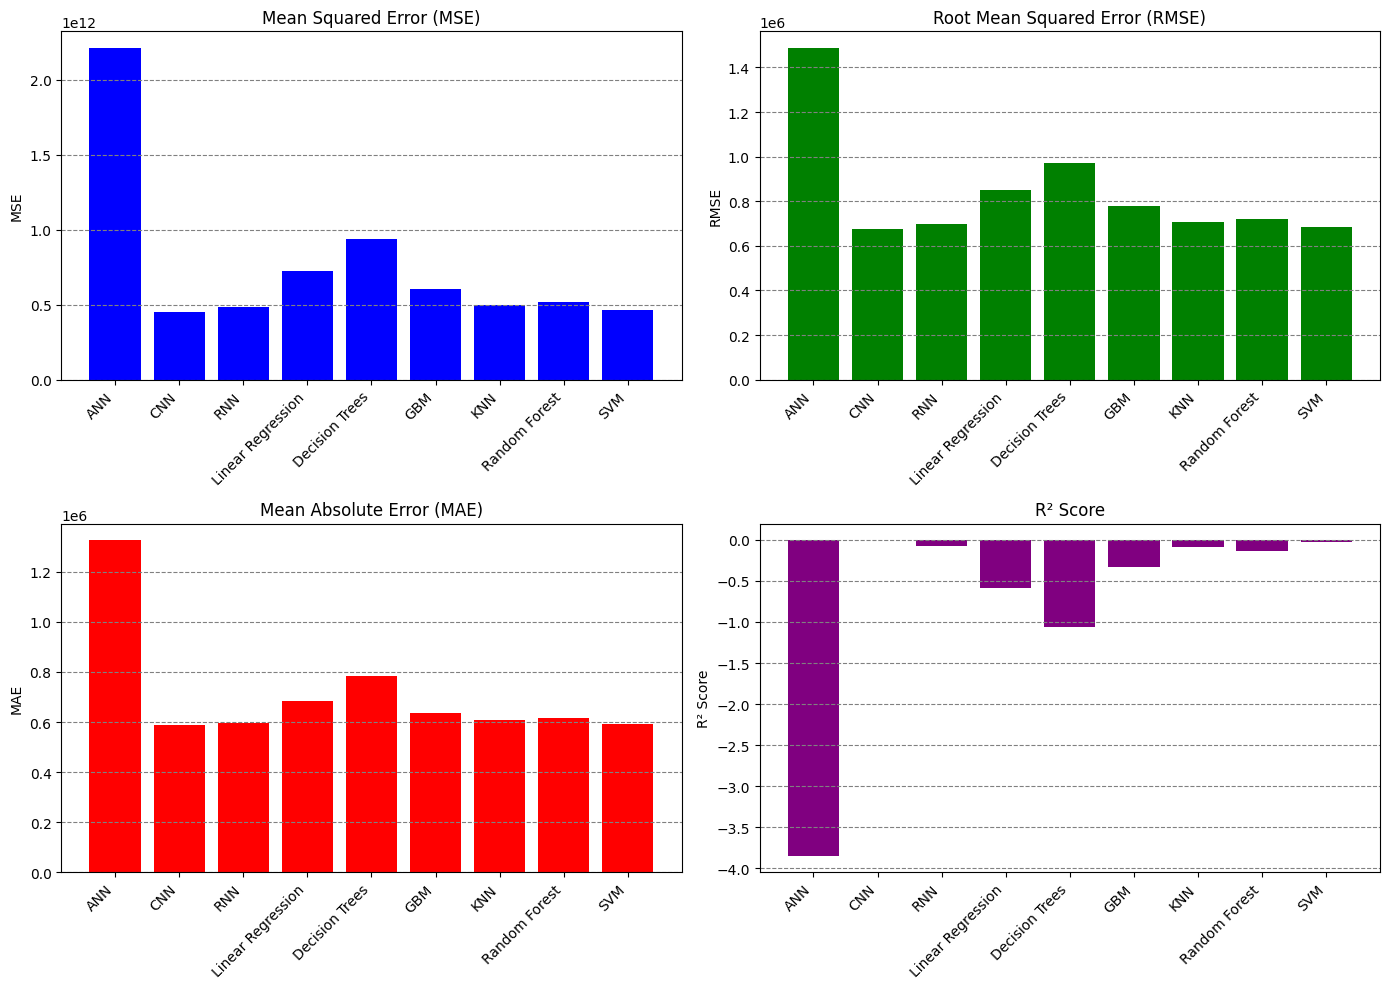

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Models and their evaluation metrics
models = ['ANN', 'CNN', 'RNN', 'Linear Regression', 'Decision Trees', 'GBM', 'KNN', 'Random Forest', 'SVM']

mse = [2213329996646.8711, 454353938350.3604, 486819114634.0746, 722620650036.6154,
       941348623853.2111, 607377124860.2338, 497608513761.4679, 518749251376.1468,
       466826365130.1498]

rmse = [1487726.4522, 674057.8153, 697724.2397, 850070.9676, 970231.2219,
        779344.0350, 705413.7182, 720242.4948, 683246.9284]

mae = [1325840.8803, 587937.1583, 595802.0917, 682151.5423, 783119.2661,
       637594.2987, 609577.9817, 617269.7248, 590550.3956]

r2 = [-3.8556, 0.0032, -0.0680, -0.5853, -1.0651, -0.3325, -0.0917, -0.1380, -0.0241]

# Create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Bar graph for MSE
axes[0, 0].bar(models, mse, color='b')
axes[0, 0].set_title('Mean Squared Error (MSE)')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].set_xticklabels(models, rotation=45, ha="right")
axes[0, 0].grid(True, axis='y', linestyle='--', color='gray')  # Horizontal dashed grid

# Bar graph for RMSE
axes[0, 1].bar(models, rmse, color='g')
axes[0, 1].set_title('Root Mean Squared Error (RMSE)')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].set_xticklabels(models, rotation=45, ha="right")
axes[0, 1].grid(True, axis='y', linestyle='--', color='gray')  # Horizontal dashed grid

# Bar graph for MAE
axes[1, 0].bar(models, mae, color='r')
axes[1, 0].set_title('Mean Absolute Error (MAE)')
axes[1, 0].set_ylabel('MAE')
axes[1, 0].set_xticklabels(models, rotation=45, ha="right")
axes[1, 0].grid(True, axis='y', linestyle='--', color='gray')  # Horizontal dashed grid

# Bar graph for R² Score
axes[1, 1].bar(models, r2, color='purple')
axes[1, 1].set_title('R² Score')
axes[1, 1].set_ylabel('R² Score')
axes[1, 1].set_xticklabels(models, rotation=45, ha="right")
axes[1, 1].grid(True, axis='y', linestyle='--', color='gray')  # Horizontal dashed grid

# Adjust layout
plt.tight_layout()
plt.show()
